In [1]:
from datetime import datetime
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [74]:
import dbnomics
barnet_transit_series_id = ["Google/GMR/GB.greater_london.london_borough_of_barnet.transit"]

In [18]:
inflation_raw = dbnomics.fetch_series(provider_code="ONS",dataset_code="MM23",series_code="D7BT.M")

In [19]:
inflation=inflation_raw[~inflation_raw.value.isna()]
inflation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 487 to 903
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   @frequency       417 non-null    object        
 1   provider_code    417 non-null    object        
 2   dataset_code     417 non-null    object        
 3   dataset_name     417 non-null    object        
 4   series_code      417 non-null    object        
 5   series_name      417 non-null    object        
 6   original_period  417 non-null    object        
 7   period           417 non-null    datetime64[ns]
 8   original_value   417 non-null    object        
 9   value            417 non-null    float64       
 10  title            417 non-null    object        
 11  freq             417 non-null    object        
 12  Title            417 non-null    object        
 13  Frequency        417 non-null    object        
dtypes: datetime64[ns](1), float64(1), object

In [20]:
inflation = inflation[['period','value']].set_index('period')

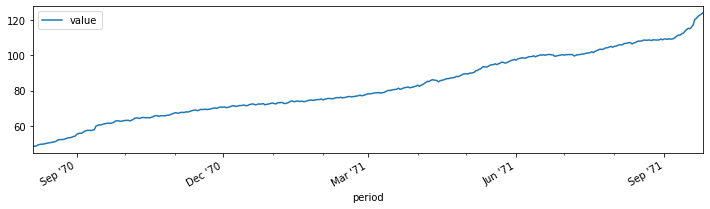

In [70]:

ax = inflation.plot(figsize=(12,3))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b '%y"))
ax.xaxis.set_minor_locator(mdates.MonthLocator(interval=1))
fig = plt.gcf()
fig.autofmt_xdate()
plt.show()

In [5]:
barnet_transit = dbnomics.fetch_series(series_ids=barnet_transit_series_id)
barnet_transit

,@frequency,provider_code,dataset_code,dataset_name,series_code,series_name,original_period,period,original_value,value,...,region_2,metro_area,place,freq,Country,Region 1,Region 2,Metropolitan area,Place,Frequency
0,daily,Google,GMR,"Global Mobility Report, percent change from ba...",GB.greater_london.london_borough_of_barnet.tra...,United Kingdom - Greater London - London Borou...,2020-02-15,2020-02-15,-10.0,-10.0,...,london_borough_of_barnet,all,transit,D,United Kingdom,Greater London,London Borough of Barnet,ALL,Transit stations,Daily
1,daily,Google,GMR,"Global Mobility Report, percent change from ba...",GB.greater_london.london_borough_of_barnet.tra...,United Kingdom - Greater London - London Borou...,2020-02-16,2020-02-16,-12.0,-12.0,...,london_borough_of_barnet,all,transit,D,United Kingdom,Greater London,London Borough of Barnet,ALL,Transit stations,Daily
2,daily,Google,GMR,"Global Mobility Report, percent change from ba...",GB.greater_london.london_borough_of_barnet.tra...,United Kingdom - Greater London - London Borou...,2020-02-17,2020-02-17,-5.0,-5.0,...,london_borough_of_barnet,all,transit,D,United Kingdom,Greater London,London Borough of Barnet,ALL,Transit stations,Daily
3,daily,Google,GMR,"Global Mobility Report, percent change from ba...",GB.greater_london.london_borough_of_barnet.tra...,United Kingdom - Greater London - London Borou...,2020-02-18,2020-02-18,-7.0,-7.0,...,london_borough_of_barnet,all,transit,D,United Kingdom,Greater London,London Borough of Barnet,ALL,Transit stations,Daily
4,daily,Google,GMR,"Global Mobility Report, percent change from ba...",GB.greater_london.london_borough_of_barnet.tra...,United Kingdom - Greater London - London Borou...,2020-02-19,2020-02-19,-10.0,-10.0,...,london_borough_of_barnet,all,transit,D,United Kingdom,Greater London,London Borough of Barnet,ALL,Transit stations,Daily
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
969,daily,Google,GMR,"Global Mobility Report, percent change from ba...",GB.greater_london.london_borough_of_barnet.tra...,United Kingdom - Greater London - London Borou...,2022-10-11,2022-10-11,-23.0,-23.0,...,london_borough_of_barnet,all,transit,D,United Kingdom,Greater London,London Borough of Barnet,ALL,Transit stations,Daily
970,daily,Google,GMR,"Global Mobility Report, percent change from ba...",GB.greater_london.london_borough_of_barnet.tra...,United Kingdom - Greater London - London Borou...,2022-10-12,2022-10-12,-22.0,-22.0,...,london_borough_of_barnet,all,transit,D,United Kingdom,Greater London,London Borough of Barnet,ALL,Transit stations,Daily
971,daily,Google,GMR,"Global Mobility Report, percent change from ba...",GB.greater_london.london_borough_of_barnet.tra...,United Kingdom - Greater London - London Borou...,2022-10-13,2022-10-13,-22.0,-22.0,...,london_borough_of_barnet,all,transit,D,United Kingdom,Greater London,London Borough of Barnet,ALL,Transit stations,Daily
972,daily,Google,GMR,"Global Mobility Report, percent change from ba...",GB.greater_london.london_borough_of_barnet.tra...,United Kingdom - Greater London - London Borou...,2022-10-14,2022-10-14,-24.0,-24.0,...,london_borough_of_barnet,all,transit,D,United Kingdom,Greater London,London Borough of Barnet,ALL,Transit stations,Daily


In [5]:
## Search for a market

In [22]:
initates_list = [
    "AllianceBernstein Holding",
    "LiqTech International",
    "Amadeus IT Group",
    "Plantronics",
    "Aerojet Rocketdyne"
    ]
results  = pd.concat([ ig_service.search_markets(search_term = s) for s in initates_list],axis = 0)
results  = results.query("expiry == 'DFB'")
results

,epic,instrumentName,instrumentType,expiry,high,low,percentageChange,netChange,updateTime,updateTimeUTC,bid,offer,delayTime,streamingPricesAvailable,marketStatus,scalingFactor
0,SA.D.ABUS.DAILY.IP,AllianceBernstein Holding LP,SHARES,DFB,None,None,0.00,0.0,01:53:49,00:53:49,4286.0,4294.0,0,False,EDITS_ONLY,1
0,SI.D.LIQTUS.DAILY.IP,LiqTech International Inc,SHARES,DFB,None,None,0.00,0.0,01:53:49,00:53:49,59.0,61.0,0,False,EDITS_ONLY,1
0,SE.D.PLT.DAILY.IP,Plantronics Inc,SHARES,DFB,None,None,0.68,27.0,01:53:49,00:53:49,3977.0,3985.0,0,False,EDITS_ONLY,1
0,SC.D.GYUS.DAILY.IP,Aerojet Rocketdyne Holdings Inc,SHARES,DFB,None,None,0.00,0.0,01:53:49,00:53:49,4128.0,4136.0,0,False,EDITS_ONLY,1


In [50]:
nasdaq = pd.read_csv("../resources/nasdaq.csv")
nasdaq.head()

,Symbol,Name,Last Sale,Net Change,% Change,Market Cap,Country,IPO Year,Volume,Sector,Industry
0,A,Agilent Technologies Inc. Common Stock,$130.55,6.700,5.41%,3.903445e+10,United States,1999.0,2698841,Industrials,Electrical Products
1,AA,Alcoa Corporation Common Stock,$64.50,1.650,2.625%,1.189694e+10,NaN,2016.0,6887413,Industrials,Metal Fabrications
2,AAC,Ares Acquisition Corporation Class A Ordinary ...,$9.81,0.000,0.00%,1.226250e+09,NaN,2021.0,805706,Finance,Business Services
3,AACG,ATA Creativity Global American Depositary Shares,$1.055,0.055,5.50%,3.333651e+07,China,2008.0,14868,Consumer Discretionary,Service to the Health Industry
4,AACI,Armada Acquisition Corp. I Common Stock,$9.85,0.010,0.102%,2.039886e+08,United States,2021.0,23754,Industrials,Consumer Electronics/Appliances


In [54]:
nasdaq_lookup = nasdaq[nasdaq.Name.str.contains("|".join(initates_list))]

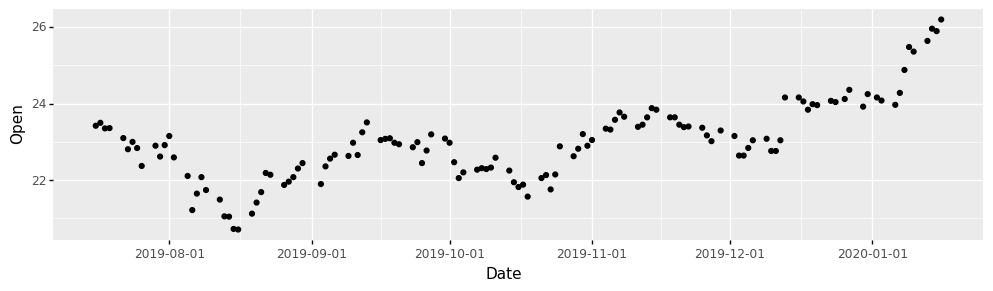

<ggplot: (306771914)>

In [66]:
plt_data=  yf.Ticker(nasdaq_lookup.Symbol.iloc[0]).history(start=START_DATE,end=END_DATE).assign(Name = nasdaq_lookup.Name.iloc[0]).reset_index()
(
    ggplot(plt_data)+
    geom_point(aes("Date","Open"))+
    theme(figure_size=[12,3])
)   

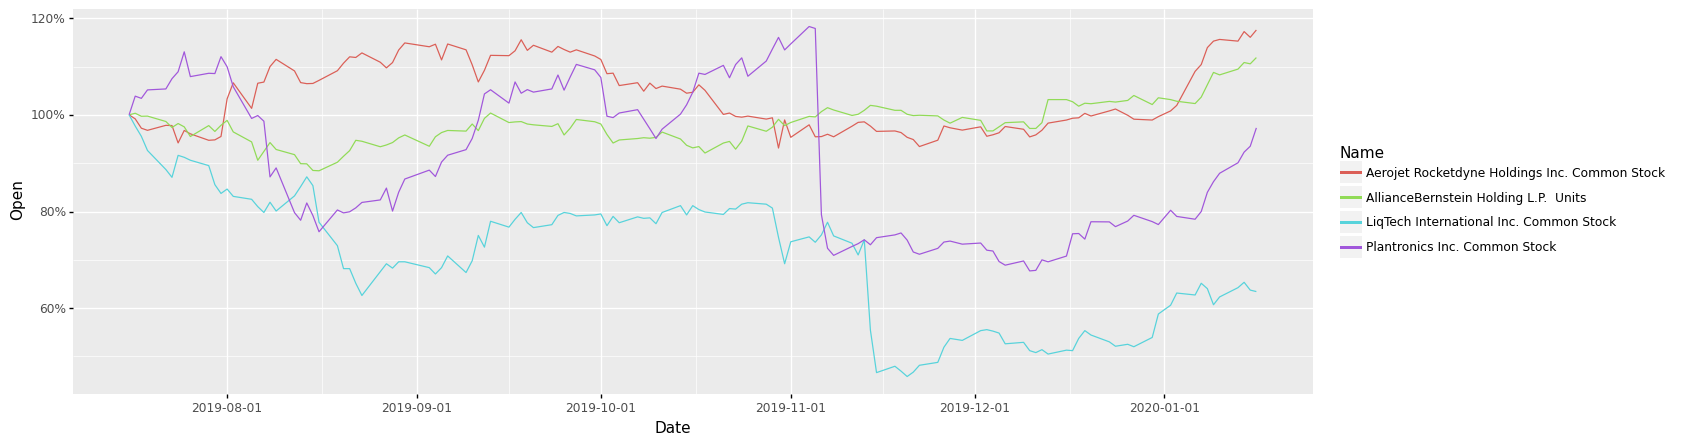

<ggplot: (307843813)>

In [84]:
indx = 2
def get_hisotry(indx):
    return yf.Ticker(nasdaq_lookup.Symbol.iloc[indx]).history(start=START_DATE,end=END_DATE).assign(Name = nasdaq_lookup.Name.iloc[indx],Open = lambda df: df.Open/ df.Open.iloc[0]).reset_index()
plt_data=  pd.concat([get_hisotry(i) for i in range(4)])
(
    ggplot(plt_data)+
    pn.geom_line(aes("Date","Open",color = 'Name'))+
    theme(figure_size=[16,5])+pn.scale_y_continuous(labels = lambda v: [str(int(x*100))+'%' for x in v])
)   

In [5]:
## Get info about a market

In [29]:
## Get historic prices
results.epic.iloc[0]

'SA.D.ABUS.DAILY.IP'

In [48]:
result = ig_service.fetch_historical_prices_by_epic(
    results.epic.iloc[1],
    start_date=START_DATE,
    end_date=END_DATE,
    resolution=RESOLUTION
    )
result['prices']

bid                         ask                     
                      Open   High    Low  Close   Open   High    Low  Close
DateTime                                                                   
2019-07-17 05:00:00  968.5  968.5  968.5  968.5  971.5  971.5  971.5  971.5
2019-07-19 05:00:00  927.6  927.6  905.6  907.6  930.4  934.4  930.4  932.4
2019-07-22 05:00:00  847.7  857.7  843.7  855.7  893.3  893.3  866.3  870.3
2019-07-23 05:00:00  866.7  892.7  846.7  892.7  869.3  912.4  869.3  911.4
2019-07-24 05:00:00  869.7  909.6  869.7  900.6  895.3  930.4  895.3  920.4
...                    ...    ...    ...    ...    ...    ...    ...    ...
2020-12-21 05:00:00  812.8  815.8  812.8  815.8  851.3  856.3  843.3  850.3
2020-12-22 05:00:00  830.8  830.8  808.8  808.8  833.2  869.3  833.2  863.3
2020-12-23 05:00:00  830.8  830.8  830.8  830.8  833.2  833.2  833.2  833.2
2020-12-24 05:00:00  805.8  817.8  798.8  817.8  851.3  870.3  851.3  854.3
2020-12-28 05:00:00  830.8  830.8  830.8  830.8  833.2  833.2  833.2  833.2

[246 rows x 8 columns]

In [31]:
## open a possition
resp = ig_service.create_open_position(
        currency_code='GBP',
        direction='BUY',
        epic=epic,
        order_type='MARKET',
        expiry="AUG-22",
        force_open='false',
        guaranteed_stop='false',
        size=0.5,
        level=None,
        limit_distance=None,
        limit_level=None,
        quote_id=None,
        stop_level=None,
        stop_distance=None,
        trailing_stop=None,
        trailing_stop_increment=None)
resp

{'date': '2022-05-27T14:28:08.975',
 'status': 'OPEN',
 'reason': 'SUCCESS',
 'dealStatus': 'ACCEPTED',
 'epic': 'MT.D.GC.Month2.IP',
 'expiry': 'AUG-22',
 'dealReference': 'JB95SDZL9ZGTYNK',
 'dealId': 'DIAAAAJHSQQFHA9',
 'affectedDeals': [{'dealId': 'DIAAAAJHSQQFHA9', 'status': 'OPENED'}],
 'level': 1859.3,
 'size': 0.5,
 'direction': 'BUY',
 'stopLevel': None,
 'limitLevel': None,
 'stopDistance': None,
 'limitDistance': None,
 'guaranteedStop': False,
 'trailingStop': False,
 'profit': None,
 'profitCurrency': None}

In [71]:
open_positions = ig_service.fetch_open_positions()
open_positions

NameError: name 'ig_service' is not defined

In [52]:
open_positions

,contractSize,createdDate,createdDateUTC,dealId,dealReference,size,direction,limitLevel,level,currency,...,percentageChange,netChange,bid,offer,updateTime,updateTimeUTC,delayTime,streamingPricesAvailable,marketStatus,scalingFactor
0,1.0,2022/04/19 13:51:32:000,2022-04-19T12:51:32,DIAAAAH58CM6UAQ,JCXLGYRUU38TYNK,0.5,BUY,None,1967.11,GBP,...,0.12,2.22,1856.0,1856.5,11:31:20,10:31:20,0,True,TRADEABLE,1
1,1.0,2022/05/27 15:28:08:000,2022-05-27T14:28:08,DIAAAAJHSQQFHA9,JB95SDZL9ZGTYNK,0.5,BUY,None,1859.30,GBP,...,0.10,1.90,1859.3,1859.9,11:31:17,10:31:17,0,True,TRADEABLE,1


## Account activity

In [49]:
from_date = datetime(2021, 1, 1)
activities = ig_service.fetch_account_activity(from_date=from_date)
activities

,date,epic,period,dealId,channel,type,status,description,details
0,2022-05-27T14:28:08,MT.D.GC.Month2.IP,AUG-22,DIAAAAJHSQQFHA9,PUBLIC_WEB_API,POSITION,ACCEPTED,Position opened: HSQQFHA9,None
1,2022-05-27T14:27:00,MT.D.GC.Month2.IP,DFB,DIAAAAJHSRBPVAY,PUBLIC_WEB_API,POSITION,REJECTED,Rejected: Market not available online,None
2,2022-04-19T12:52:30,CS.D.USCGC.TODAY.IP,DFB,DIAAAAH58CLB6AW,PUBLIC_WEB_API,POSITION,REJECTED,Rejected: Invalid size,None
3,2022-04-19T12:51:32,CS.D.USCGC.TODAY.IP,DFB,DIAAAAH58CM6UAQ,PUBLIC_WEB_API,POSITION,ACCEPTED,Position opened: 58CM6UAQ,None
4,2021-12-29T01:00:42,IX.D.FTSE.DAILY.IP,DFB,DIAAAAHCHLBTCAJ,PUBLIC_WEB_API,POSITION,ACCEPTED,Position/s closed: CHLDWVAK,None
5,2021-12-29T01:00:31,IX.D.FTSE.DAILY.IP,DFB,DIAAAAHCHKYL2AP,PUBLIC_WEB_API,POSITION,ACCEPTED,Position/s closed: CHEUNXA6,None
6,2021-12-29T00:58:56,IX.D.FTSE.DAILY.IP,DFB,DIAAAAHCHLDWVAK,PUBLIC_WEB_API,POSITION,ACCEPTED,Position opened: CHLDWVAK,None
7,2021-12-28T23:56:08,IX.D.FTSE.DAILY.IP,DFB,DIAAAAHCHEUNXA6,PUBLIC_WEB_API,POSITION,ACCEPTED,Position opened: CHEUNXA6,None
8,2021-12-28T23:55:44,IX.D.FTSE.DAILY.IP,DFB,DIAAAAHCHF4YAAS,PUBLIC_WEB_API,POSITION,REJECTED,Rejected: Amount per point below minimum for t...,None
9,2021-12-22T08:02:55,CS.D.GBPUSD.TODAY.IP,DFB,DIAAAAHACA4VTBC,SYSTEM,POSITION,ACCEPTED,Position/s closed: UFMJ49AH,None


In [4]:
## streaming api
from trading_ig import IGService, IGStreamService
from trading_ig.config import config
from trading_ig.lightstreamer import Subscription

In [8]:
import time

updated_df = pd.DataFrame()
def on_update(item):
    print(item)
    
    print("{UPDATE_TIME:<8} {stock_name:<19} Bid {BID:>5} Ask {OFFER:>5}".format(stock_name=item["name"], **item["values"]))


In [ ]:
ig_service = IGService(config.username, config.password, config.api_key, config.acc_type, acc_number=config.acc_number)
ig_stream_service = IGStreamService(ig_service)
ig_stream_service.create_session()
sub = Subscription(mode="MERGE", items=["L1:CS.D.GBPUSD.TODAY.IP"], fields=["UPDATE_TIME", "BID", "OFFER"])
sub.addlistener(on_update)
ig_stream_service.ls_client.subscribe(sub)
ig_stream_service.disconnect()

15:07:25 L1:CS.D.GBPUSD.TODAY.IP Bid 12646.5 Ask 12647.4
15:07:25 L1:CS.D.GBPUSD.TODAY.IP Bid 12646.3 Ask 12647.2
15:07:26 L1:CS.D.GBPUSD.TODAY.IP Bid 12646.4 Ask 12647.3
15:07:26 L1:CS.D.GBPUSD.TODAY.IP Bid 12646.3 Ask 12647.2
15:07:26 L1:CS.D.GBPUSD.TODAY.IP Bid 12646.4 Ask 12647.3
15:07:27 L1:CS.D.GBPUSD.TODAY.IP Bid 12646.3 Ask 12647.2
15:07:28 L1:CS.D.GBPUSD.TODAY.IP Bid 12646.8 Ask 12647.7
15:07:28 L1:CS.D.GBPUSD.TODAY.IP Bid 12646.7 Ask 12647.6
15:07:29 L1:CS.D.GBPUSD.TODAY.IP Bid 12646.4 Ask 12647.9
15:07:29 L1:CS.D.GBPUSD.TODAY.IP Bid 12646.5 Ask 12648.0
15:07:29 L1:CS.D.GBPUSD.TODAY.IP Bid 12647.0 Ask 12647.9
15:07:29 L1:CS.D.GBPUSD.TODAY.IP Bid 12646.6 Ask 12648.1
15:07:30 L1:CS.D.GBPUSD.TODAY.IP Bid 12647.1 Ask 12648.0
15:07:30 L1:CS.D.GBPUSD.TODAY.IP Bid 12647.3 Ask 12648.2
15:07:31 L1:CS.D.GBPUSD.TODAY.IP Bid 12646.9 Ask 12648.4
15:07:31 L1:CS.D.GBPUSD.TODAY.IP Bid 12647.3 Ask 12648.2
15:07:31 L1:CS.D.GBPUSD.TODAY.IP Bid 12647.4 Ask 12648.3
15:07:31 L1:CS.D.GBPUSD.TODAY.I

In [6]:
result = ig_service.fetch_historical_prices_by_epic(
    epic='CS.D.USCGC.TODAY.IP',
    start_date="2022-02-01",
    end_date="2022-02-03",resolution="4H"
    )
result['prices']

bid                                 ask           \
                        Open     High      Low    Close     Open     High   
DateTime                                                                    
2022-02-01 00:00:00  1797.58  1799.21  1795.52  1796.41  1798.08  1799.71   
2022-02-01 04:00:00  1796.42  1804.23  1796.12  1803.97  1796.92  1804.70   
2022-02-01 08:00:00  1803.96  1808.21  1801.69  1806.13  1804.26  1808.58   
2022-02-01 12:00:00  1806.15  1808.64  1797.59  1804.32  1806.45  1809.14   
2022-02-01 16:00:00  1804.31  1807.81  1799.17  1799.31  1804.61  1808.20   
2022-02-01 20:00:00  1799.26  1802.29  1798.33  1800.56  1799.56  1802.68   
2022-02-02 00:00:00  1800.58  1801.46  1797.14  1797.45  1801.08  1801.96   
2022-02-02 04:00:00  1797.48  1798.90  1794.25  1796.66  1797.98  1799.40   
2022-02-02 08:00:00  1796.65  1803.48  1796.31  1802.65  1796.95  1803.97   
2022-02-02 12:00:00  1802.66  1810.53  1800.31  1808.38  1803.16  1811.03   
2022-02-02 16:00:00  1808.36  1810.63  1807.15  1807.29  1808.86  1811.09   
2022-02-02 20:00:00  1807.28  1808.14  1804.95  1807.64  1807.78  1808.64   
2022-02-03 00:00:00  1807.74  1808.89  1805.78  1806.86  1808.04  1809.30   

                                      last                        
                         Low    Close Open High Low Close Volume  
DateTime                                                          
2022-02-01 00:00:00  1795.96  1796.91  NaN  NaN NaN   NaN  16731  
2022-02-01 04:00:00  1796.62  1804.27  NaN  NaN NaN   NaN  21791  
2022-02-01 08:00:00  1802.10  1806.43  NaN  NaN NaN   NaN  28129  
2022-02-01 12:00:00  1798.09  1804.62  NaN  NaN NaN   NaN  54681  
2022-02-01 16:00:00  1799.61  1799.61  NaN  NaN NaN   NaN  32270  
2022-02-01 20:00:00  1798.83  1801.06  NaN  NaN NaN   NaN  14087  
2022-02-02 00:00:00  1797.60  1797.95  NaN  NaN NaN   NaN  13295  
2022-02-02 04:00:00  1794.69  1796.96  NaN  NaN NaN   NaN  17624  
2022-02-02 08:00:00  1796.61  1803.15  NaN  NaN NaN   NaN  28738  
2022-02-02 12:00:00  1800.76  1808.88  NaN  NaN NaN   NaN  50055  
2022-02-02 16:00:00  1807.63  1807.79  NaN  NaN NaN   NaN  28855  
2022-02-02 20:00:00  1805.34  1808.14  NaN  NaN NaN   NaN  12681  
2022-02-03 00:00:00  1806.28  1807.36  NaN  NaN NaN   NaN  13645

In [34]:
ig

{'accountType': 'SPREADBET',
 'accountInfo': {'balance': 10643.25,
  'deposit': 46.36,
  'profitLoss': -56.5,
  'available': 10540.39},
 'currencyIsoCode': 'GBP',
 'currencySymbol': '£',
 'currentAccountId': 'Z4JO3H',
 'lightstreamerEndpoint': 'https://demo-apd.marketdatasystems.com',
 'accounts': [{'accountId': 'Z4JO3G',
   'accountName': 'CFD',
   'preferred': False,
   'accountType': 'CFD'},
  {'accountId': 'Z4JO3H',
   'accountName': 'Ezra Spread bet',
   'preferred': True,
   'accountType': 'SPREADBET'}],
 'clientId': '103142528',
 'timezoneOffset': 1,
 'hasActiveDemoAccounts': True,
 'hasActiveLiveAccounts': True,
 'trailingStopsEnabled': False,
 'reroutingEnvironment': None,
 'dealingEnabled': True}

In [4]:
msft = yf.Ticker("MSFT")

In [48]:
# get stock info
print(msft.info.keys())
msft.info['sector']

NameError: name 'msft' is not defined

In [15]:
from datetime import datetime,timedelta
today =datetime.now()#.strftime("%Y-%m-%d")
three_months_ago = today+timedelta(days=-90)

def format_date(date):
    return date.strftime("%Y-%m-%d")

In [16]:
history_raw = msft.history(
    period="1d",
    end = format_date(today),
    start = format_date(three_months_ago)
)
history_raw.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-01-18,303.442565,309.160722,301.117356,302.025482,42333200,0.0,0
2022-01-19,305.657985,313.262256,302.075397,302.704071,45933900,0.0,0
2022-01-20,308.432248,311.006911,300.518619,300.977661,35380700,0.0,0
2022-01-21,302.065420,303.482473,295.000012,295.419159,57984400,0.0,0
2022-01-24,291.597075,296.496917,275.480375,295.758453,85731500,0.0,0


In [ ]:
(
    ggplot(history_raw)+
    geom_point(aes(x,y))+
    theme()
)   

In [28]:
hist = hist_raw.reset_index().reset_index()

In [ ]:
## Fit a simple linear regression with a quadratic term to the last 3 months, and buy/ sell accordingly

In [58]:
# import statsmodels as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [66]:

X_poly[0:3]

array([[1., 0.],
       [1., 1.],
       [1., 2.]])

In [51]:
import plotnine as pn
from plotnine import ggplot, geom_line, aes

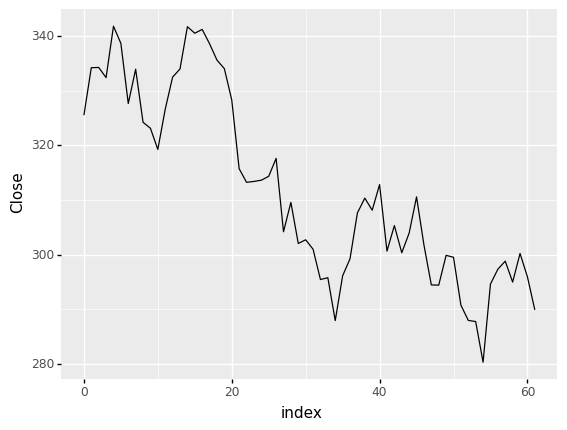

<ggplot: (302096649)>

In [23]:
(
    ggplot(hist.reset_index().reset_index())+
    geom_line(pn.aes('index','Close'))
    )


In [116]:
# np.array(hist['index']).reshape(-1,1)

In [117]:
linreg = LinearRegression()
linreg.fit(np.array(hist['index']).reshape(-1,1),  hist.Close)

LinearRegression()

In [118]:
polyreg =  LinearRegression()
poly =  PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(np.array(hist['index']).reshape(-1,1))
polyreg.fit(X_poly,hist.Close)

LinearRegression()

In [114]:
# inputs = np.linspace(0,60,100)
# poly = PolynomialFeatures(degree = 2)
# inputs = poly.fit_transform(inputs.reshape(-1,1))

# poly = PolynomialFeatures(degree = 3)
# inputs = poly.fit_transform(inputs.reshape(-1,1))



In [140]:
X_poly[:,1]

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
       52., 53., 54., 55., 56., 57., 58., 59., 60., 61.])

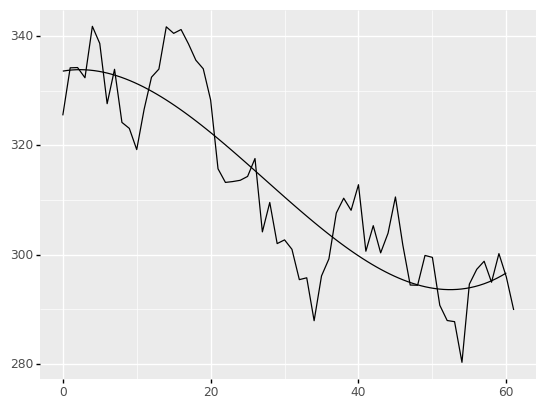

<ggplot: (306785818)>

In [145]:
def plot_model(model = linreg):
    inputs = np.linspace(0,60,100)
    inputs = poly.fit_transform(inputs.reshape(-1,1))

    preds= polyreg.predict(inputs)

    gg = (
        ggplot()+
        geom_line(aes(inputs[:,1],preds))+ # plot the model
        geom_line(aes(hist['index'],hist['Close']))
    )
    return gg

plot_model(polyreg)




In [42]:
linreg.predict(np.array([[1]]))

array([336.047157])

In [1]:
import boto3

In [2]:
s3_client = boto3.client('s3')

In [4]:

s3_resource = boto3.resource('s3')

In [10]:
for bucket in s3_resource.buckets.all():
    print(bucket.name)

test-bucket31


In [12]:
mybucket = s3_resource.Bucket('test-bucket31')

In [13]:
for my_bucket_object in mybucket.objects.all():
    print(my_bucket_object)

s3.ObjectSummary(bucket_name='test-bucket31', key='Screenshot 2022-02-06 at 21.11.56.png')
s3.ObjectSummary(bucket_name='test-bucket31', key='wage.csv')


In [19]:
s3_resource.Object('test-bucket31', 'wage.csv').download_file(
    f"tmp/{'wage.csv'}") # Python 3.6+s3_resource

open_positions:
Index(['size', 'high', 'updateTime', 'netChange', 'contractSize', 'delayTime',
       'currency', 'createdDateUTC', 'level', 'direction',
       'limitedRiskPremium', 'controlledRisk', 'instrumentName',
       'marketStatus', 'instrumentType', 'offer', 'createdDate', 'expiry',
       'bid', 'updateTimeUTC', 'trailingStopDistance', 'percentageChange',
       'limitLevel', 'dealReference', 'low', 'stopLevel', 'trailingStep',
       'scalingFactor', 'lotSize', 'dealId', 'epic',
       'streamingPricesAvailable'],
      dtype='object')
